# 1

### 1.1

Для ошибки нужно создать два модуля, каждый из которых будет импортировать другой

### 1.2

Модуль загружается 1 раз

### 1.3

Это не изменит переменную в some_module. Другие модули, которые импортируют some_module.GLOBAL_VAR, увидят старое значение.

Надо использовать
```
import some_module
some_module.GLOBAL_VAR = 42
```

### 1.4

Определить список имён для импорта через __all__ в модуле

### 1.5

In [ ]:
def load_confg(filename):
    namespace = {}
    with open(filename) as f:
        code = f.read()
    exec(code, namespace)
    return namespace

# 2

### 2.1

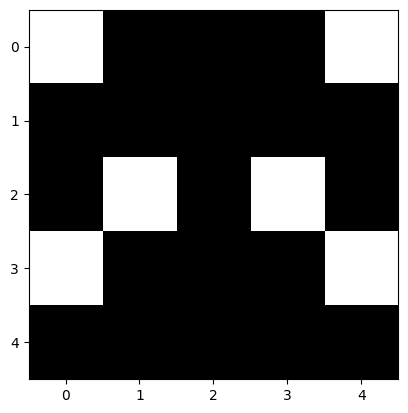

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def generate_sprite(size=5):
    half = np.random.randint(0, 2, (size, size // 2 + 1))
    sprite = np.hstack((half, np.fliplr(half[:, :-1])))
    return sprite


sprite = generate_sprite()


plt.imshow(sprite, cmap='gray', interpolation='nearest')

plt.show()

### 2.2

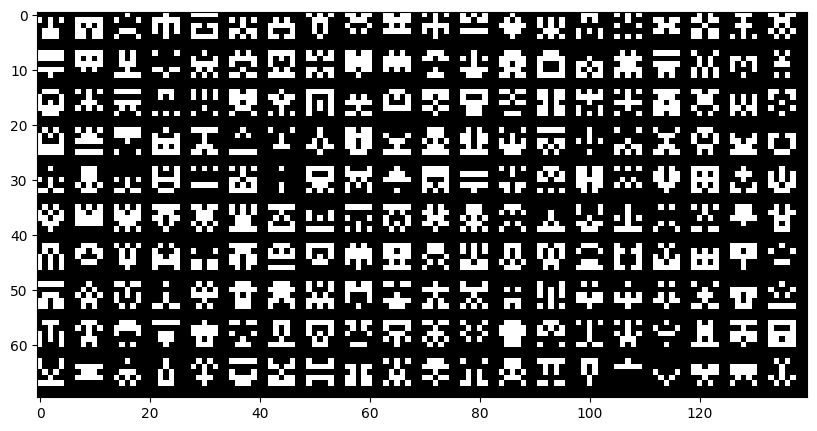

In [4]:
def generate_sprite(size=5):

    half = np.random.randint(0, 2, (size, size // 2 + 1))
    return np.hstack((half, np.fliplr(half[:, :-1])))

def generate_sprite_map(rows=10, cols=20, sprite_size=5, spacing=2):
    cell_size = sprite_size + spacing
    map_height = rows * cell_size
    map_width = cols * cell_size
    sprite_map = np.zeros((map_height, map_width), dtype=int)

    for i in range(rows):
        for j in range(cols):
            sprite = generate_sprite(sprite_size)
            y_start, y_end = i * cell_size, i * cell_size + sprite_size
            x_start, x_end = j * cell_size, j * cell_size + sprite_size
            sprite_map[y_start:y_end, x_start:x_end] = sprite

    return sprite_map


sprite_map = generate_sprite_map()


plt.figure(figsize=(10, 5))
plt.imshow(sprite_map, cmap='gray', interpolation='nearest')

plt.show()

### 2.3

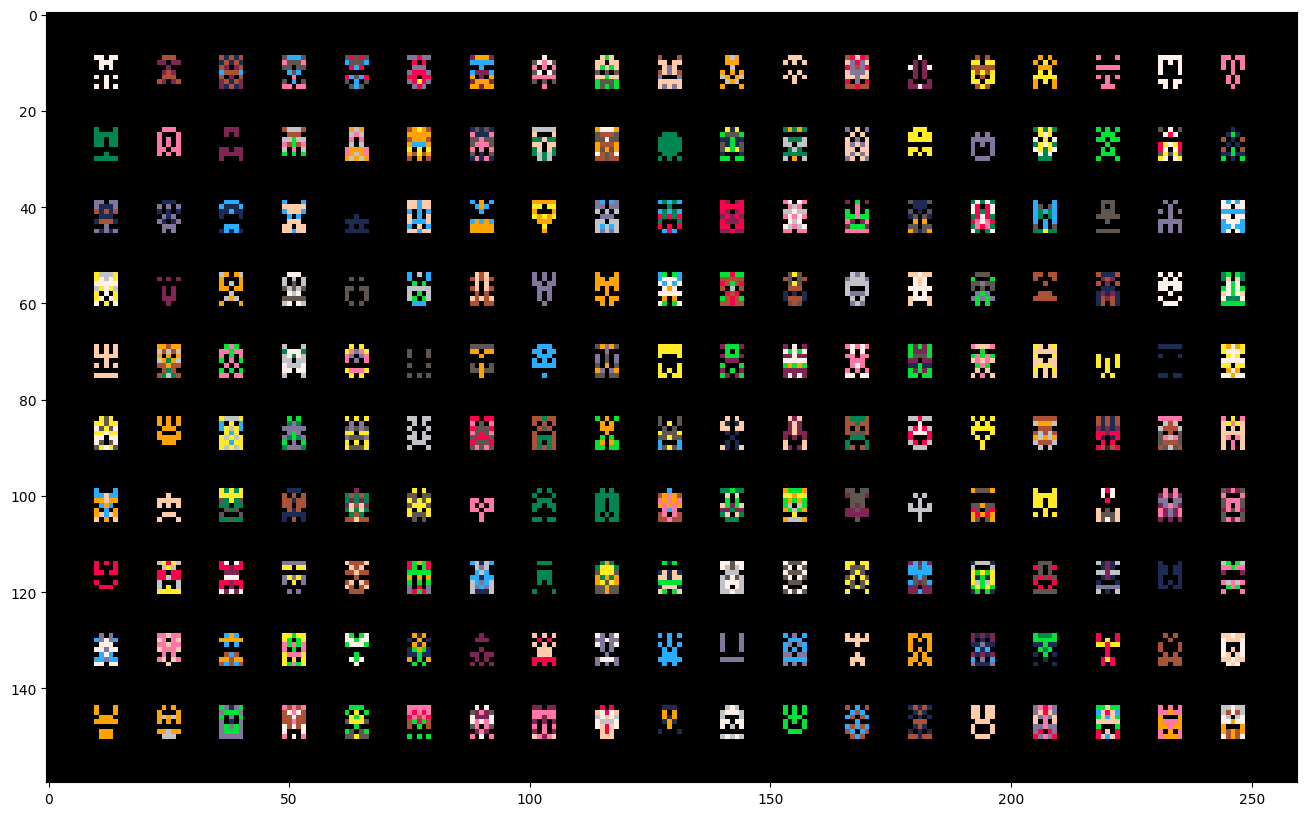

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random


pico8_hex = [
    "1D2B53", "7E2553", "008751", "AB5236", "5F574F",
    "C2C3C7", "FFF1E8", "FF004D", "FFA300", "FFEC27",
    "00E436", "29ADFF", "83769C", "FF77A8", "FFCCAA"
]

def hex_to_rgb(hex_str):
    r = int(hex_str[0:2], 16) / 255.
    g = int(hex_str[2:4], 16) / 255.
    b = int(hex_str[4:6], 16) / 255.
    return np.array([r, g, b])


pico8_nonblack = [hex_to_rgb(c) for c in pico8_hex]

def generate_sprite(sprite_height=9, sprite_width=6):


    num_colors = np.random.randint(2, 6)

    local_palette = [np.array([0, 0, 0])] + random.sample(pico8_nonblack, num_colors - 1)


    half_cols = sprite_width // 2
    left_half = np.random.randint(0, num_colors, size=(sprite_height, half_cols))

    if sprite_width % 2 == 0:
        sprite_idx = np.hstack((left_half, np.fliplr(left_half)))
    else:
        center_col = np.random.randint(0, num_colors, size=(sprite_height, 1))
        sprite_idx = np.hstack((left_half, center_col, np.fliplr(left_half)))

    sprite = np.zeros((sprite_height, sprite_width, 3))
    for i in range(sprite_height):
        for j in range(sprite_width):
            sprite[i, j] = local_palette[sprite_idx[i, j]]

    return sprite

def generate_sprite_map(canvas_height, canvas_width, sprite_height, sprite_width, spacing_v, spacing_h):

    rows = (canvas_height - spacing_v) // (sprite_height + spacing_v)
    cols = (canvas_width - spacing_h) // (sprite_width + spacing_h)


    grid_height = rows * sprite_height + (rows + 1) * spacing_v
    grid_width  = cols * sprite_width  + (cols + 1) * spacing_h


    sprite_map = np.zeros((canvas_height, canvas_width, 3))


    offset_y = (canvas_height - grid_height) // 2
    offset_x = (canvas_width  - grid_width) // 2

    for i in range(rows):
        for j in range(cols):
            sprite = generate_sprite(sprite_height, sprite_width)

            y_start = offset_y + i * (sprite_height + spacing_v) + spacing_v
            y_end   = y_start + sprite_height
            x_start = offset_x + j * (sprite_width + spacing_h) + spacing_h
            x_end   = x_start + sprite_width
            sprite_map[y_start:y_end, x_start:x_end] = sprite

    return sprite_map


sprite_map = generate_sprite_map(canvas_height=160, canvas_width=260, sprite_height=7, sprite_width=5, spacing_v=8, spacing_h=8)


plt.figure(figsize=(20,10))
plt.imshow(sprite_map)


plt.show()


### 2.4

Lave (ID 7): x=20, y=173, TL=4, Pop=25, Gov=3, Econ=5
Zaonce (ID 129): x=33, y=185, TL=11, Pop=53, Gov=7, Econ=1
Diso (ID 147): x=11, y=174, TL=7, Pop=41, Gov=6, Econ=6
Last System (ID 255, Name: Orerve): x=12, y=203, TL=5


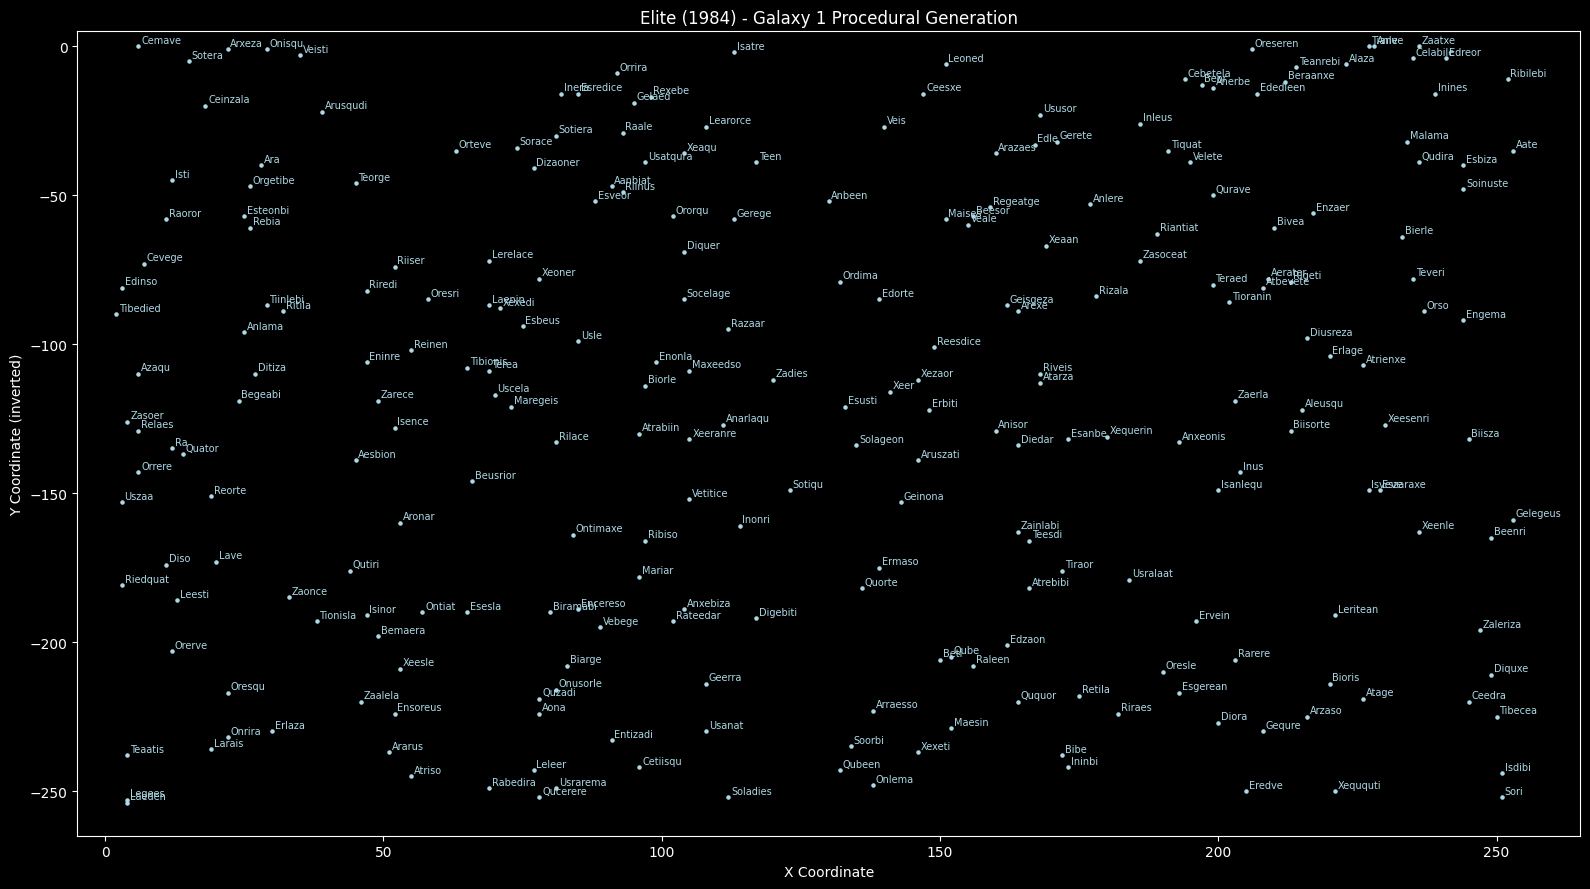

In [6]:
import matplotlib.pyplot as plt
import typing
from dataclasses import dataclass

PAIRS = ("..LEXEGEZACEBISO"
         "USESARMAINDIREA."
         "ERATENBERALAVETI"
         "EDORQUANTEISRION")

W0_INIT = 0x5A4A
W1_INIT = 0x0248
W2_INIT = 0xB753

@dataclass
class Seed:
    w0: int
    w1: int
    w2: int

@dataclass
class FastSeed:
    a: int
    b: int
    c: int
    d: int

@dataclass
class PlanSys:
    x: int
    y: int
    economy: int
    govtype: int
    techlev: int
    population: int
    productivity: int
    radius: int
    goatsoup_seed: FastSeed
    name: str = ""
    id: int = -1

def tweak_seed(seed: Seed) -> None:
    temp = (seed.w0 + seed.w1 + seed.w2) & 0xFFFF
    seed.w0 = seed.w1
    seed.w1 = seed.w2
    seed.w2 = temp

def make_system(seed: Seed) -> PlanSys:
    w0_orig = seed.w0

    x = (seed.w1 >> 8) & 0xFF
    y = (seed.w0 >> 8) & 0xFF

    govtype = (seed.w1 >> 3) & 7
    economy = (seed.w0 >> 8) & 7
    if govtype <= 1:
        economy |= 2

    techlev = ((seed.w1 >> 8) & 3) + (economy ^ 7)
    techlev += govtype >> 1
    if (govtype & 1) == 1:
        techlev += 1

    techlev = max(0, techlev)
    population = 4 * techlev + economy + govtype + 1

    productivity = ((economy ^ 7) + 3) * (govtype + 4)
    productivity *= population * 8

    radius = 256 * (((seed.w2 >> 8) & 15) + 11) + x

    gs_a = seed.w1 & 0xFF
    gs_b = (seed.w1 >> 8) & 0xFF
    gs_c = seed.w2 & 0xFF
    gs_d = (seed.w2 >> 8) & 0xFF
    goatsoup = FastSeed(a=gs_a, b=gs_b, c=gs_c, d=gs_d)

    long_name_flag = (w0_orig & 64) != 0

    pair1_idx = 2 * ((seed.w2 >> 8) & 31); tweak_seed(seed)
    pair2_idx = 2 * ((seed.w2 >> 8) & 31); tweak_seed(seed)
    pair3_idx = 2 * ((seed.w2 >> 8) & 31); tweak_seed(seed)
    pair4_idx = 2 * ((seed.w2 >> 8) & 31); tweak_seed(seed)

    name_parts = [
        PAIRS[pair1_idx : pair1_idx + 2],
        PAIRS[pair2_idx : pair2_idx + 2],
        PAIRS[pair3_idx : pair3_idx + 2],
    ]

    if long_name_flag:
        name_parts.append(PAIRS[pair4_idx : pair4_idx + 2])

    name = "".join(name_parts).replace('.', '')
    name = name.capitalize()

    system = PlanSys(
        x=x,
        y=y,
        economy=economy,
        govtype=govtype,
        techlev=techlev,
        population=population,
        productivity=productivity,
        radius=radius,
        goatsoup_seed=goatsoup,
        name=name
    )
    return system

galaxy_systems: typing.List[PlanSys] = []
current_seed = Seed(w0=W0_INIT, w1=W1_INIT, w2=W2_INIT)

for i in range(256):
    system = make_system(current_seed)
    system.id = i
    galaxy_systems.append(system)

lave_sys = next((sys for sys in galaxy_systems if sys.name == "Lave"), None)
if lave_sys:
     print(f"Lave (ID {lave_sys.id}): x={lave_sys.x}, y={lave_sys.y}, TL={lave_sys.techlev}, Pop={lave_sys.population}, Gov={lave_sys.govtype}, Econ={lave_sys.economy}")
else:
    print("Lave not found.")

zaonce_sys = next((sys for sys in galaxy_systems if sys.name == "Zaonce"), None)
if zaonce_sys:
     print(f"Zaonce (ID {zaonce_sys.id}): x={zaonce_sys.x}, y={zaonce_sys.y}, TL={zaonce_sys.techlev}, Pop={zaonce_sys.population}, Gov={zaonce_sys.govtype}, Econ={zaonce_sys.economy}")
else:
    print("Zaonce not found.")

diso_sys = next((sys for sys in galaxy_systems if sys.name == "Diso"), None)
if diso_sys:
     print(f"Diso (ID {diso_sys.id}): x={diso_sys.x}, y={diso_sys.y}, TL={diso_sys.techlev}, Pop={diso_sys.population}, Gov={diso_sys.govtype}, Econ={diso_sys.economy}")
else:
    print("Diso not found.")

last_sys = galaxy_systems[-1]
print(f"Last System (ID {last_sys.id}, Name: {last_sys.name}): x={last_sys.x}, y={last_sys.y}, TL={last_sys.techlev}")

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(16, 9))

x_coords = [sys.x for sys in galaxy_systems]
y_coords = [-sys.y for sys in galaxy_systems]
names = [sys.name for sys in galaxy_systems]

POINT_COLOR = 'lightblue'
TEXT_COLOR = 'lightblue'
POINT_SIZE = 5
TEXT_SIZE = 7

ax.scatter(x_coords, y_coords, s=POINT_SIZE, c=POINT_COLOR)

for i, name in enumerate(names):
    ax.text(x_coords[i] + 0.5, y_coords[i] + 0.5, name, fontsize=TEXT_SIZE, color=TEXT_COLOR, ha='left', va='bottom')

ax.set_xlim(-5, 265)
ax.set_ylim(-265, 5)
ax.set_title("Elite (1984) - Galaxy 1 Procedural Generation")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate (inverted)")
ax.grid(False)

plt.tight_layout()
plt.show()

# 3

### 3.1

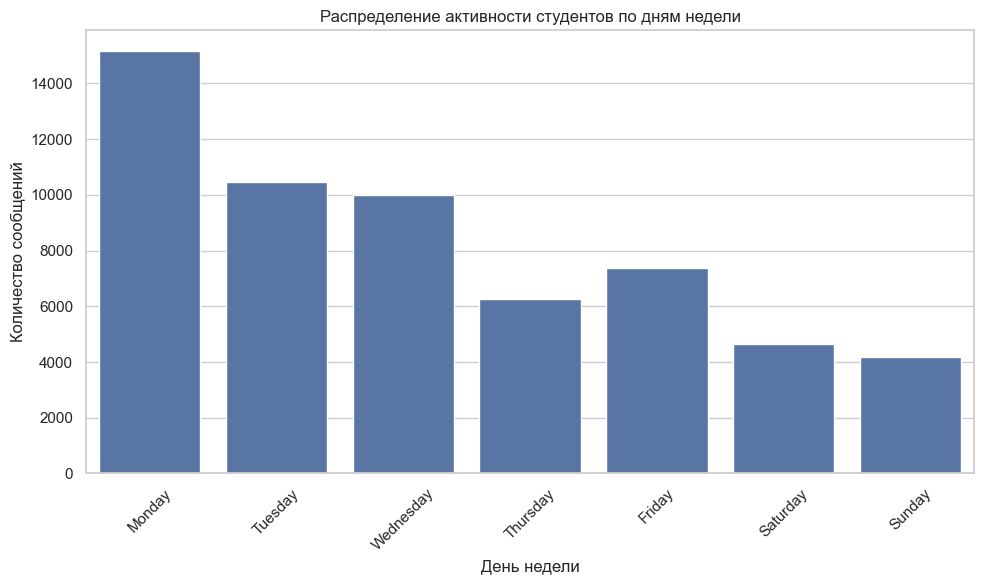

In [5]:
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import ast

def parse_time_robust(text):
    if isinstance(text, (datetime.datetime, datetime.date)): return text
    if not isinstance(text, str): return pd.NaT
    try: return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        try: return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S')
        except ValueError:
             try: return datetime.datetime.strptime(text, '%Y-%m-%d')
             except ValueError: return pd.NaT

msg_cols = ['id', 'task', 'variant', 'group', 'time']
chk_cols = ['id', 'message', 'time', 'status']
sts_cols = ['task', 'variant', 'group', 'time', 'status', 'achievements']
grp_cols = ['id', 'title']

messages_df = pd.read_csv('messages.csv', names=msg_cols, header=0)
checks_df = pd.read_csv('checks.csv', names=chk_cols, header=0)
statuses_df = pd.read_csv('statuses.csv', names=sts_cols, header=0)
groups_df = pd.read_csv('groups.csv', names=grp_cols, header=0)

messages_df['time'] = messages_df['time'].apply(parse_time_robust)
checks_df['time'] = checks_df['time'].apply(parse_time_robust)
statuses_df['time'] = statuses_df['time'].apply(parse_time_robust)

messages_df.dropna(subset=['time'], inplace=True)
checks_df.dropna(subset=['time'], inplace=True)
statuses_df.dropna(subset=['time'], inplace=True)

messages_df['group'] = pd.to_numeric(messages_df['group'], errors='coerce').astype('Int64')
statuses_df['group'] = pd.to_numeric(statuses_df['group'], errors='coerce').astype('Int64')
groups_df['id'] = pd.to_numeric(groups_df['id'], errors='coerce').astype('Int64')
checks_df['status'] = pd.to_numeric(checks_df['status'], errors='coerce').astype('Int64')

messages_df['id'] = messages_df['id'].astype(str)
checks_df['message'] = checks_df['message'].astype(str)
checks_df['id'] = checks_df['id'].astype(str)

messages_df.dropna(subset=['group'], inplace=True)
statuses_df.dropna(subset=['group'], inplace=True)
groups_df.dropna(subset=['id'], inplace=True)
checks_df.dropna(subset=['status'], inplace=True)


sns.set(style="whitegrid")

def count_achievements(ach_string):
    if pd.isna(ach_string) or ach_string in ('', '[]', '{}', '()', "''", '""', 'set()'): return 0
    try:
        parsed_literal = ast.literal_eval(ach_string)
        if isinstance(parsed_literal, (list, tuple, set)): return len(parsed_literal)
        elif isinstance(parsed_literal, str) and parsed_literal: return 1
        else: return 0
    except (ValueError, SyntaxError):
         if isinstance(ach_string, str) and ach_string.strip():
             parts = [part for part in ach_string.strip().split(',') if part.strip()]
             return len(parts)
         return 0

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

messages_df['day_of_week'] = messages_df['time'].dt.dayofweek
messages_per_day = messages_df['day_of_week'].value_counts().sort_index()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.barplot(x=day_names, y=messages_per_day.values)
plt.title('Распределение активности студентов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.2

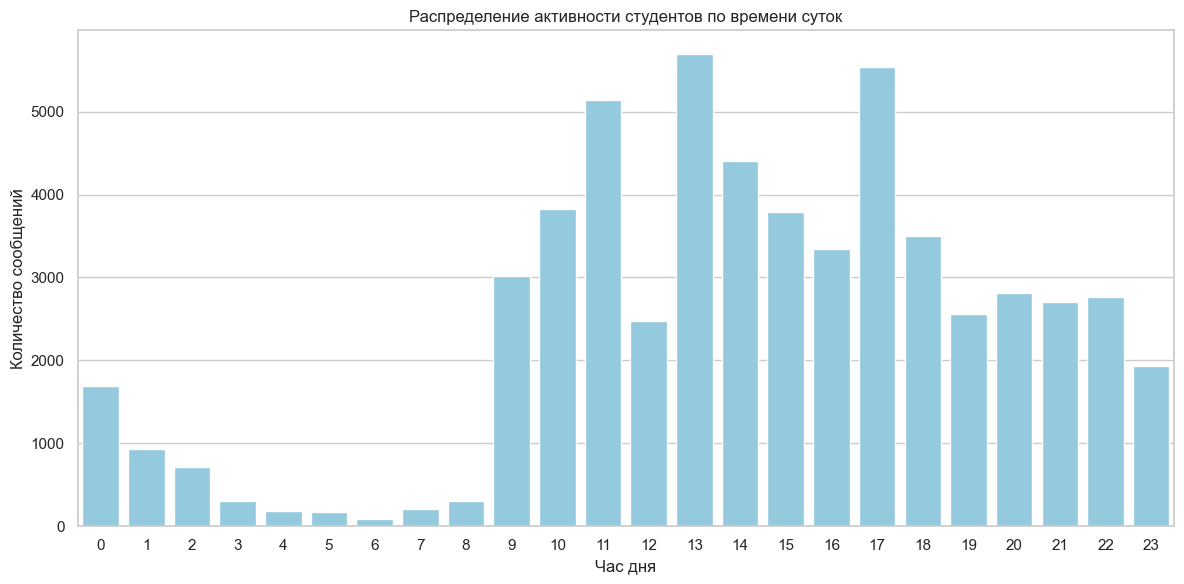

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

messages_df['hour_of_day'] = messages_df['time'].dt.hour
messages_per_hour = messages_df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
# Ensure all hours 0-23 are present, filling missing ones with 0
messages_per_hour = messages_per_hour.reindex(range(24), fill_value=0)
sns.barplot(x=messages_per_hour.index, y=messages_per_hour.values, color='skyblue')
plt.title('Распределение активности студентов по времени суток')
plt.xlabel('Час дня')
plt.ylabel('Количество сообщений')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### 3.3

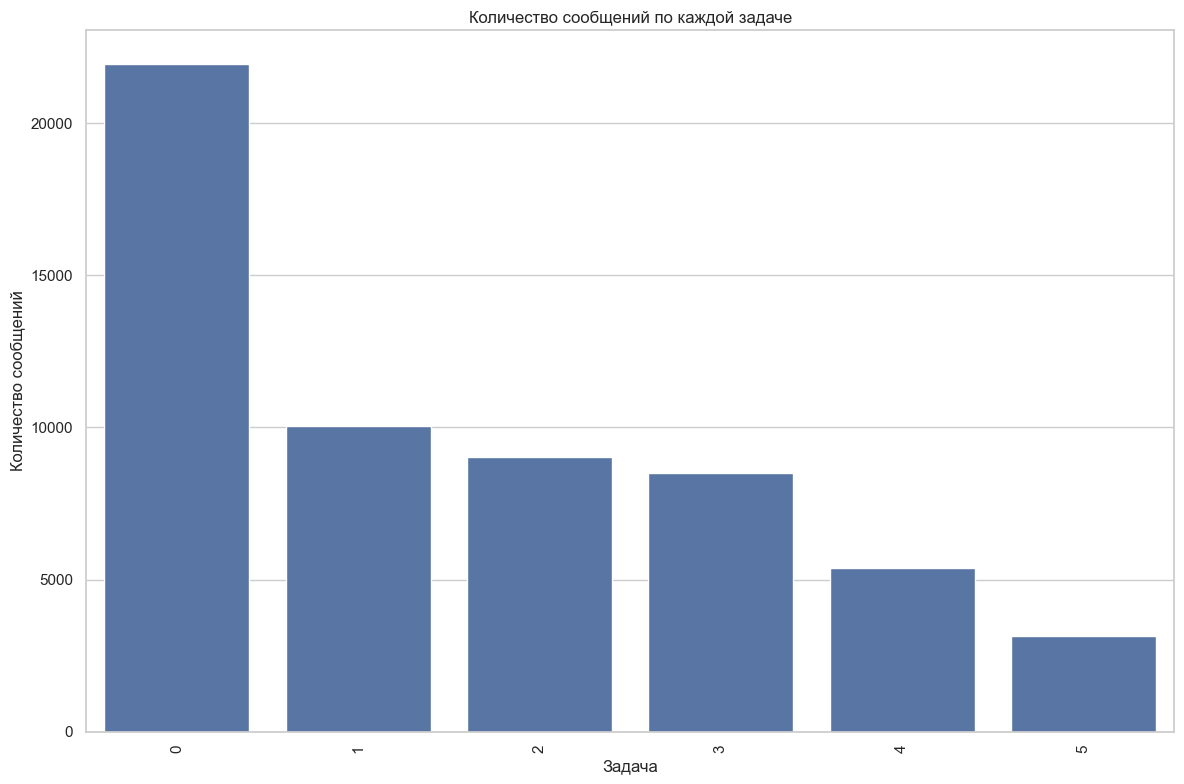

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

messages_per_task = messages_df.groupby('task')['id'].count().sort_values(ascending=False)

N = 20
if len(messages_per_task) > N:
    messages_per_task = messages_per_task.head(N)
    plot_title = f'Количество сообщений по {N} самым активным задачам'
else:
     plot_title = 'Количество сообщений по каждой задаче'


plt.figure(figsize=(12, 8))
sns.barplot(x=messages_per_task.index, y=messages_per_task.values, order=messages_per_task.index)
plt.title(plot_title)
plt.xlabel('Задача')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.4

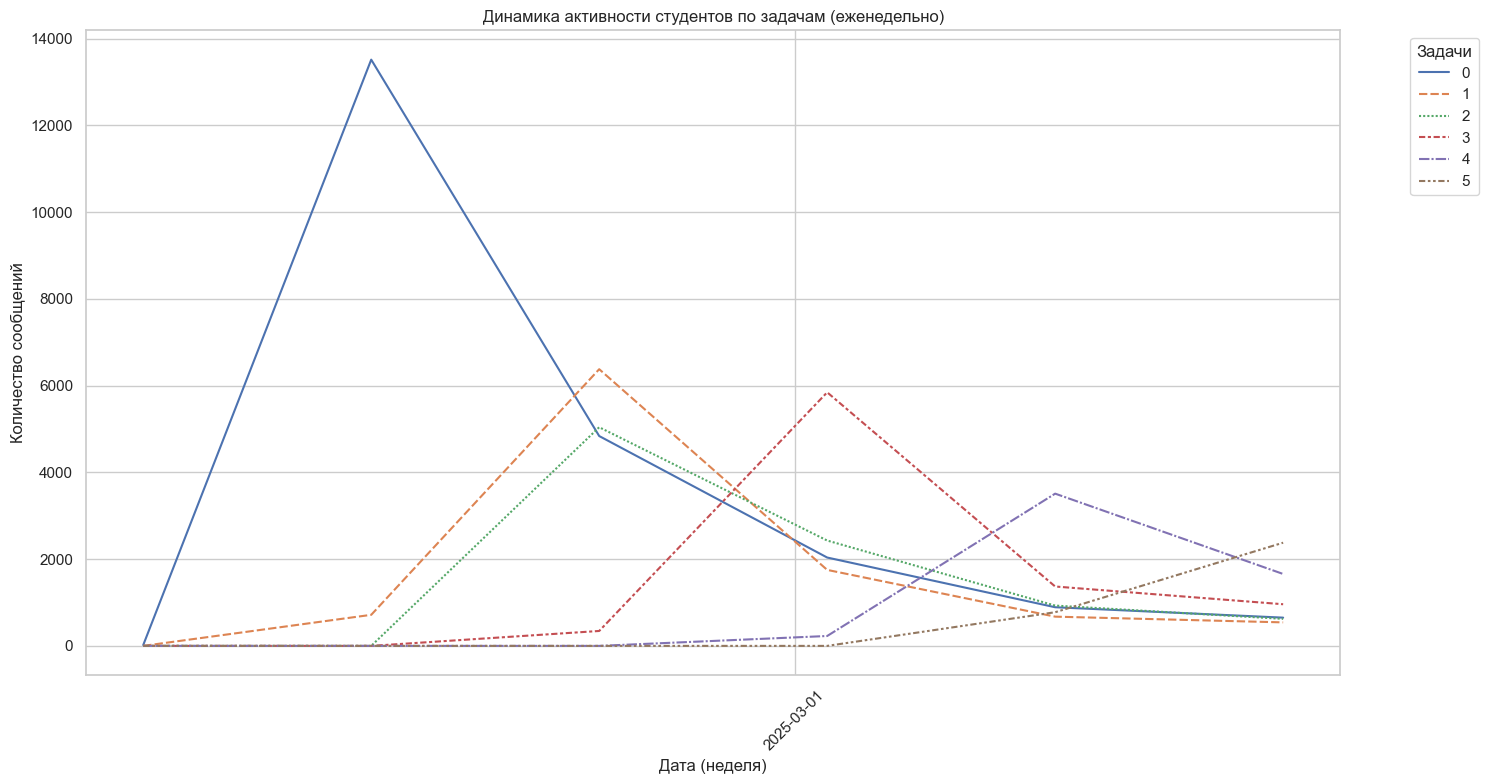

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns



activity_over_time = messages_df.set_index('time').groupby([pd.Grouper(freq='W'), 'task'])['id'].count().unstack(fill_value=0)


plt.figure(figsize=(15, 8))
sns.lineplot(data=activity_over_time)

plt.title('Динамика активности студентов по задачам (еженедельно)')
plt.xlabel('Дата (неделя)')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=45)
plt.legend(title='Задачи', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # Show ticks roughly monthly
plt.tight_layout()
plt.show()

### 3.5

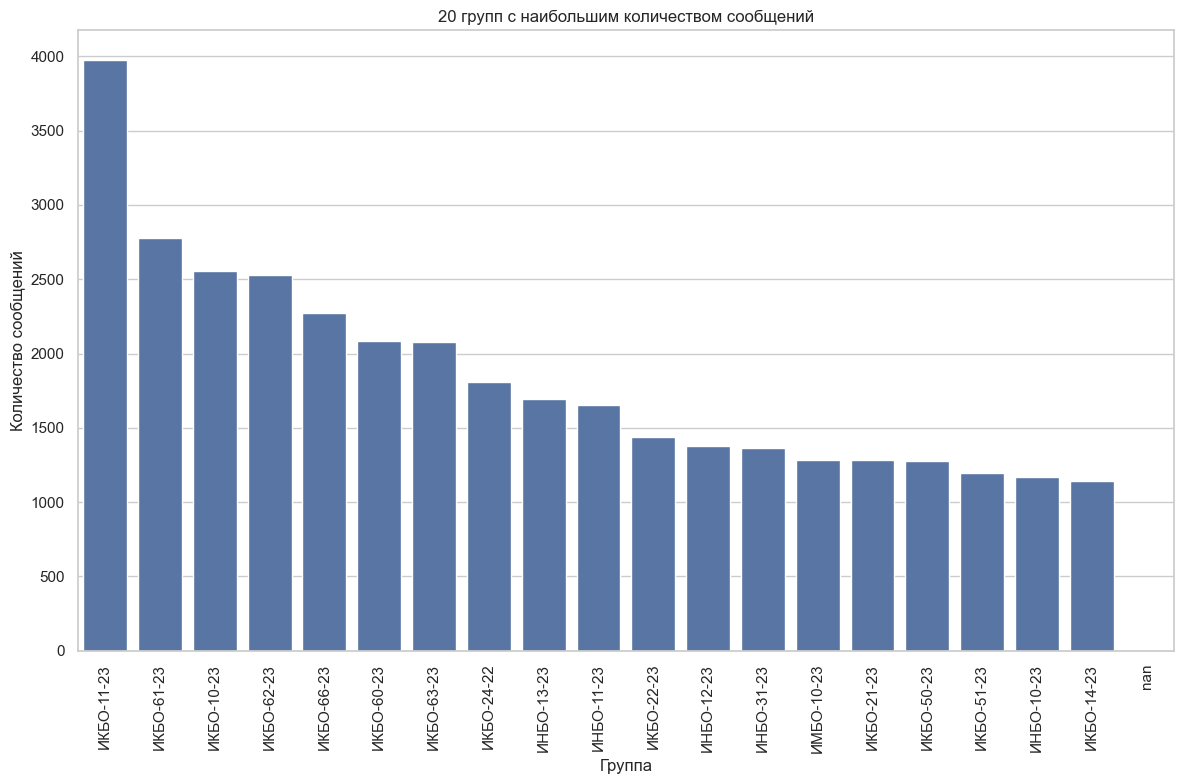

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


messages_per_group = messages_df['group'].value_counts()
messages_per_group_df = messages_per_group.reset_index()
messages_per_group_df.columns = ['group_id', 'message_count']
messages_per_group_df['group_id'] = messages_per_group_df['group_id'].astype(int)
groups_df['id'] = groups_df['id'].astype(int)

messages_per_group_named = pd.merge(
    messages_per_group_df,
    groups_df,
    left_on='group_id',
    right_on='id',
    how='left'
)


messages_per_group_named = messages_per_group_named.set_index('title')['message_count'].sort_values(ascending=False)
messages_per_group_named.index.name = 'group_title'


N = 20
plot_data = messages_per_group_named.head(N)
if len(messages_per_group_named) > N:
    plot_title = f'{N} групп с наибольшим количеством сообщений'
else:
    plot_title = 'Количество сообщений по группам'
    plot_data = messages_per_group_named
plt.figure(figsize=(12, 8))
sns.barplot(x=plot_data.index, y=plot_data.values, order=plot_data.index)
plt.title(plot_title)
plt.xlabel('Группа')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.6

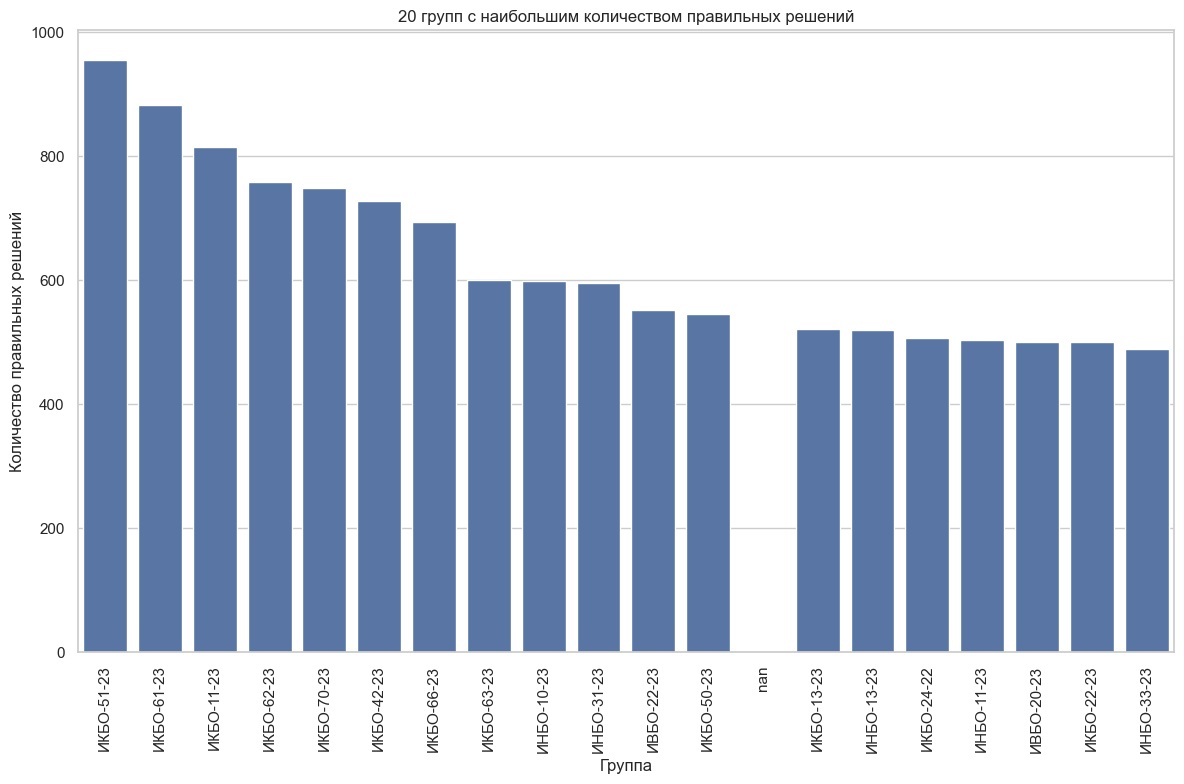

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

messages_df['id'] = messages_df['id'].astype(str)
checks_df['message'] = checks_df['message'].astype(str)
groups_df['id'] = groups_df['id'].astype('Int64')
messages_df['group'] = messages_df['group'].astype('Int64')
checks_df['status'] = checks_df['status'].astype('Int64')

ok_checks = checks_df[checks_df['status'] == 3].copy()


merged_ok = pd.merge(
    ok_checks[['message']],
    messages_df[['id', 'group']],
    left_on='message',
    right_on='id',
    how='inner'
)


ok_per_group = merged_ok['group'].value_counts()


ok_per_group_df = ok_per_group.reset_index()
ok_per_group_df.columns = ['group_id', 'ok_count']

ok_per_group_named_df = pd.merge(
    ok_per_group_df,
    groups_df,
    left_on='group_id',
    right_on='id',
    how='left'
)


ok_per_group_final = ok_per_group_named_df.set_index('title')['ok_count'].sort_values(ascending=False)
ok_per_group_final.index.name = 'group_title'

N = 20
plot_data = ok_per_group_final.head(N)
plot_title = f'{N} групп с наибольшим количеством правильных решений' if len(ok_per_group_final) > N else 'Количество правильных решений по группам'


plt.figure(figsize=(12, 8))
sns.barplot(x=plot_data.index, y=plot_data.values, order=plot_data.index)
plt.title(plot_title)
plt.xlabel('Группа')
plt.ylabel('Количество правильных решений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.7

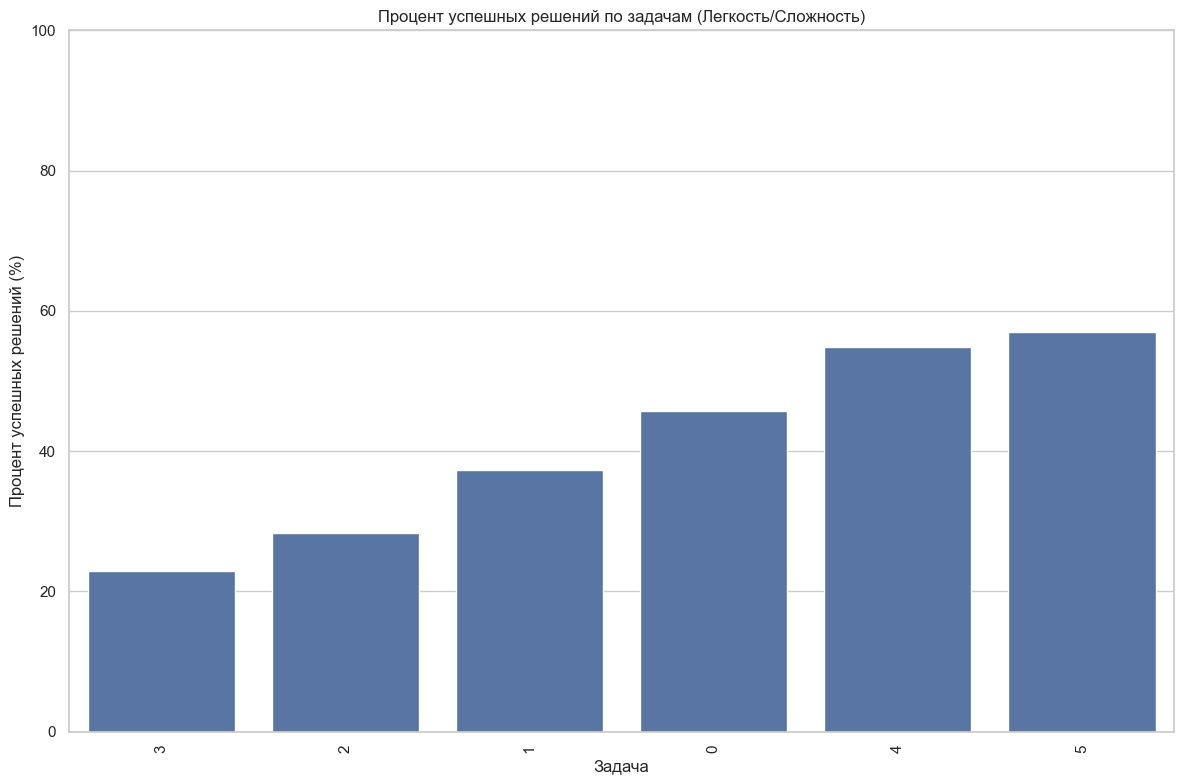

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

messages_df['id'] = messages_df['id'].astype(str)
checks_df['message'] = checks_df['message'].astype(str)
checks_df['status'] = checks_df['status'].astype('Int64')

total_messages_per_task = messages_df.groupby('task')['id'].count()

ok_checks = checks_df[checks_df['status'] == 3].copy()

ok_messages_per_task = pd.Series(dtype=int)

if not ok_checks.empty:
    ok_merged = pd.merge(
        ok_checks[['message']],
        messages_df[['id', 'task']],
        left_on='message',
        right_on='id',
        how='inner'
    )

    if not ok_merged.empty:
        ok_messages_per_task = ok_merged.groupby('task')['message'].count()

ok_counts = ok_messages_per_task.reindex(total_messages_per_task.index).fillna(0)
total_counts = total_messages_per_task
success_rate = (ok_counts.astype(float) / total_counts.astype(float)).fillna(0) * 100
success_rate = success_rate.sort_values()

plot_data = success_rate[total_counts > 0].dropna()

if not plot_data.empty:
    N_display = 50
    plot_data_final = plot_data
    plot_title = 'Процент успешных решений по задачам (Легкость/Сложность)'
    if len(plot_data) > N_display:
        plot_data_final = pd.concat([plot_data.head(N_display // 2), plot_data.tail(N_display // 2)])
        plot_title = f'{N_display} задач (самые сложные и легкие по % OK)'

    plt.figure(figsize=(12, 8))
    sns.barplot(x=plot_data_final.index, y=plot_data_final.values, order=plot_data_final.index)
    plt.title(plot_title)
    plt.xlabel('Задача')
    plt.ylabel('Процент успешных решений (%)')
    plt.xticks(rotation=90)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

### 3.8

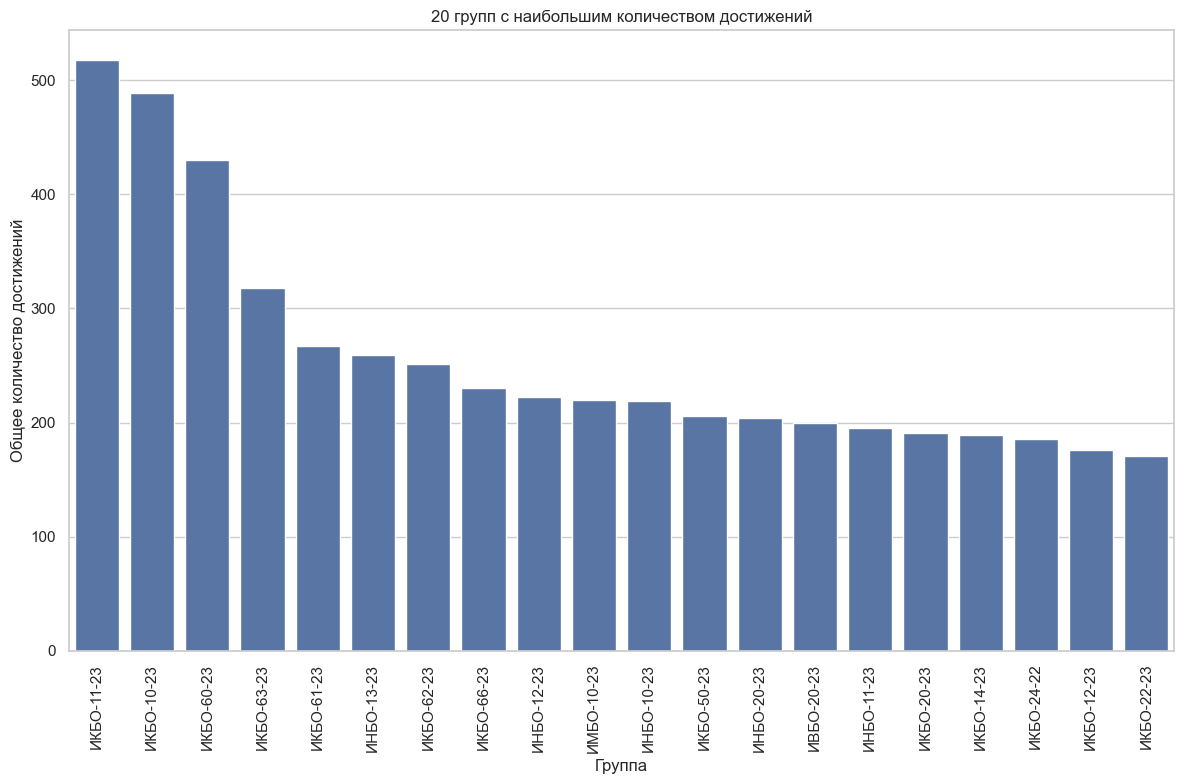

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

def count_achievements(ach_string):
    if pd.isna(ach_string) or ach_string in ('', '[]', '{}', '()', "''", '""', 'set()'):
        return 0
    try:
        parsed_literal = ast.literal_eval(ach_string)
        if isinstance(parsed_literal, (list, tuple, set)):
            return len(parsed_literal)
        elif isinstance(parsed_literal, str) and parsed_literal:
             return 1
        else:
            return 0
    except (ValueError, SyntaxError):
         if isinstance(ach_string, str) and ach_string.strip():
             parts = [part for part in ach_string.strip().split(',') if part.strip()]
             return len(parts)
         return 0

statuses_df['ach_count'] = statuses_df['achievements'].apply(count_achievements)

achievements_per_group = statuses_df.groupby('group')['ach_count'].sum()

achievements_per_group.index = achievements_per_group.index.astype(int)
groups_df['id'] = groups_df['id'].astype(int)

achievements_per_group_named = pd.merge(
    achievements_per_group.reset_index(),
    groups_df,
    left_on='group',
    right_on='id',
    how='left'
)
achievements_per_group_named = achievements_per_group_named.set_index('title')['ach_count'].sort_values(ascending=False)
achievements_per_group_named.index.name = 'group_title'

N = 20
if len(achievements_per_group_named) > N:
    achievements_per_group_named = achievements_per_group_named.head(N)
    plot_title = f'{N} групп с наибольшим количеством достижений'
else:
    plot_title = 'Количество достижений по группам'

plt.figure(figsize=(12, 8))
sns.barplot(x=achievements_per_group_named.index, y=achievements_per_group_named.values, order=achievements_per_group_named.index)
plt.title(plot_title)
plt.xlabel('Группа')
plt.ylabel('Общее количество достижений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()